In [1]:
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as tt
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# rat data (BDA3, p. 102)
n_tumour = np.array([
     0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
     1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  5,  2,
     5,  3,  2,  7,  7,  3,  3,  2,  9, 10,  4,  4,  4,  4,  4,  4,  4,
    10,  4,  4,  4,  5, 11, 12,  5,  5,  6,  5,  6,  6,  6,  6, 16, 15,
    15,  9,  4
])
n_rat = np.array([
    20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 18, 18, 17, 20, 20, 20,
    20, 19, 19, 18, 18, 25, 24, 23, 20, 20, 20, 20, 20, 20, 10, 49, 19,
    46, 27, 17, 49, 47, 20, 20, 13, 48, 50, 20, 20, 20, 20, 20, 20, 20,
    48, 19, 19, 19, 22, 46, 49, 20, 20, 23, 19, 22, 20, 20, 20, 52, 46,
    47, 24, 14
])

In [3]:
with pm.Model() as model:
    # Uninformative prior for alpha and beta
    u = pm.Uniform('u', 0, 1)
    v = pm.Uniform('v', 0, 1)
    
    alpha = pm.Deterministic('a', u / tt.pow(v, 2))
    beta = pm.Deterministic('b', (1 - u) / tt.pow(v, 2))
    pm.Potential('p(a,b)', tt.log(tt.pow(alpha+beta, -5/2)))
    
    theta = pm.Beta('theta', alpha=alpha, beta=beta, shape=len(n_rat))

    p = pm.Binomial('y', p=theta, observed=n_tumour, n=n_rat)

In [4]:
model.test_point

{'theta_logodds__': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]), 'u_interval__': array(0.), 'v_interval__': array(0.)}

In [5]:
model.check_test_point()

theta_logodds__    -69.64
u_interval__        -1.39
v_interval__        -1.39
y                 -631.61
Name: Log-probability of test_point, dtype: float64

In [6]:
with model:
    trace = pm.sample(1000, init='adapt_diag', tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta, v, u]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:11<00:00, 344.59draws/s]
The number of effective samples is smaller than 25% for some parameters.


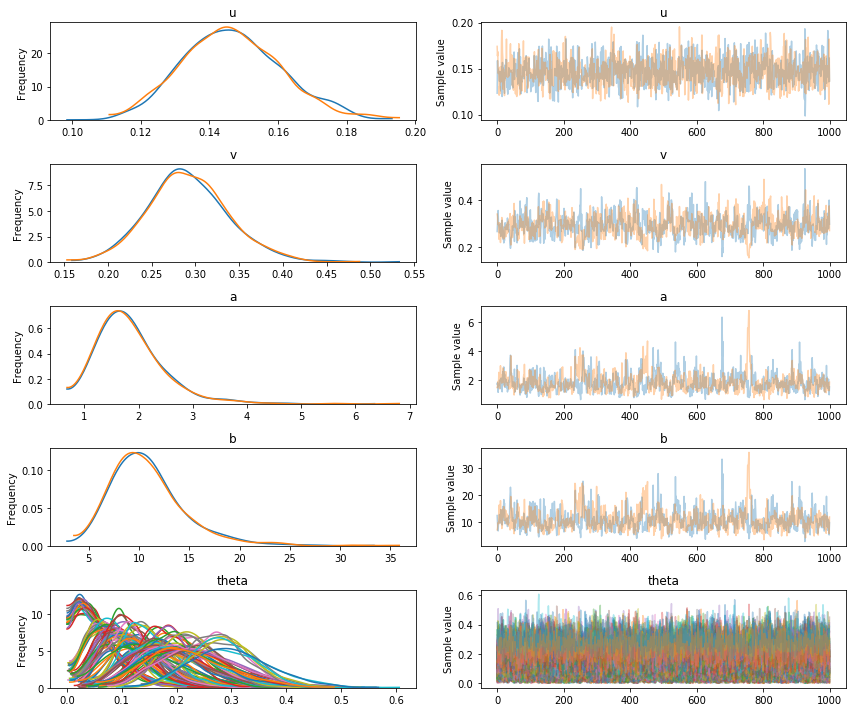

In [7]:
pm.traceplot(trace);

In [8]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
u,0.146501,0.014498,0.000412,0.119588,0.176151,1124.605952,0.999539
v,0.291608,0.046167,0.001939,0.202805,0.382962,435.314901,0.999543
a,1.850018,0.638839,0.030666,0.838400,3.052057,337.606906,0.999522
b,10.854316,3.757723,0.177175,4.889833,18.387419,336.388284,0.999510
theta__0,0.054943,0.041308,0.000897,0.000020,0.138090,1795.659723,1.000285
theta__1,0.055775,0.040616,0.000974,0.001045,0.134908,1534.110621,0.999520
theta__2,0.054306,0.041465,0.000998,0.000162,0.133515,1999.290172,0.999543
theta__3,0.054529,0.039383,0.000880,0.000476,0.132935,1872.690188,0.999502
theta__4,0.054966,0.040653,0.000927,0.000707,0.132945,1803.671377,1.000518
theta__5,0.056389,0.042394,0.000834,0.001255,0.143235,2192.226024,0.999771


In [9]:
with pm.Model() as model:
    # Uninformative prior for alpha and beta
    alpha = pm.HalfFlat('a', testval=.05)
    beta = pm.HalfFlat('b', testval=.05)
    pm.Potential('p(a,b)', tt.log(tt.pow(alpha+beta, -5/2)))
    
    theta = pm.Beta('theta', alpha=alpha, beta=beta, shape=len(n_rat))

    p = pm.Binomial('y', p=theta, observed=n_tumour, n=n_rat)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta, b, a]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:22<00:00, 175.13draws/s]
The acceptance probability does not match the target. It is 0.8794492509042117, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


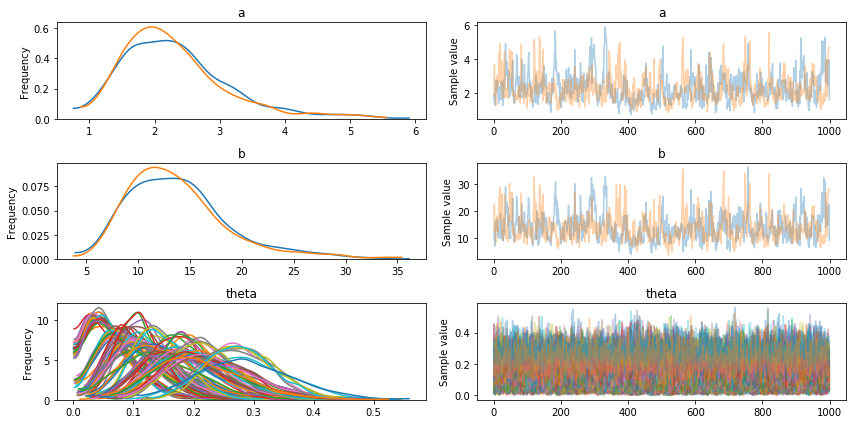

In [10]:
with model:
    trace = pm.sample(1000, tune=1000)

pm.traceplot(trace);

In [11]:
import pymc3.distributions.transforms as tr

def logp_ab(value):
    return tt.log(tt.pow(tt.sum(value), -5/2))

with pm.Model() as model:
    # Uninformative prior for alpha and beta
    ab = pm.DensityDist('ab', logp_ab, transform=tr.log, 
                        shape=2, 
                        testval=np.asarray([1., 1.]))
    
    theta = pm.Beta('theta', alpha=ab[0], beta=ab[1], shape=len(n_rat))

    p = pm.Binomial('y', p=theta, observed=n_tumour, n=n_rat)

In [12]:
model.check_test_point()

ab_log__            -3.47
theta_logodds__    -98.43
y                 -631.61
Name: Log-probability of test_point, dtype: float64

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta, ab]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:20<00:00, 285.76draws/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 33 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6720370899037524, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


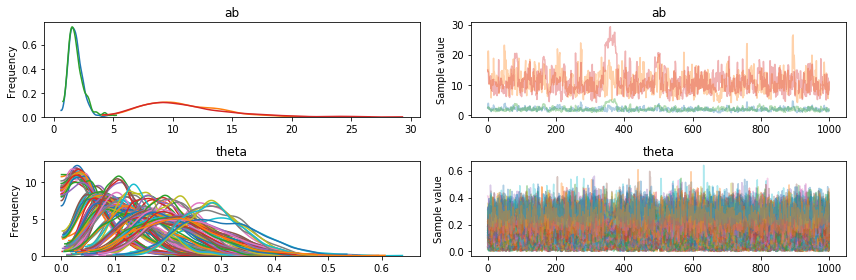

In [13]:
with model:
    trace = pm.sample(1000, tune=2000)

pm.traceplot(trace);

In [14]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
ab__0,1.882407,0.655590,0.040998,0.799585,3.053778,154.144800,1.004675
ab__1,10.988149,3.832457,0.226303,4.954476,18.853951,183.124698,1.002376
theta__0,0.056087,0.040830,0.000951,0.001168,0.136282,1765.290133,1.000307
theta__1,0.057599,0.044838,0.001625,0.000111,0.142871,505.619354,1.003719
theta__2,0.055618,0.041126,0.001360,0.000774,0.136181,646.530413,1.001895
theta__3,0.055114,0.038903,0.000981,0.000084,0.127773,1601.396160,0.999783
theta__4,0.056431,0.041461,0.001380,0.000037,0.134876,658.353386,1.000192
theta__5,0.056917,0.039819,0.001171,0.000648,0.136013,871.547255,1.001662
theta__6,0.056802,0.042938,0.001316,0.000025,0.141753,915.666581,1.000846
theta__7,0.057689,0.041560,0.001295,0.000180,0.137886,933.203283,0.999509


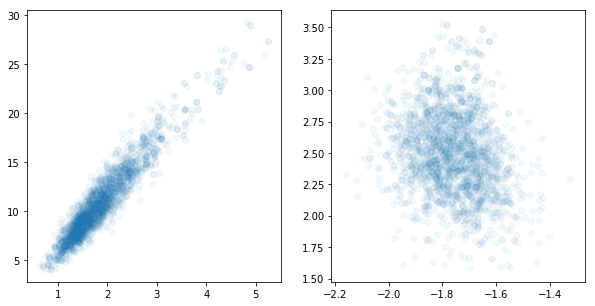

In [15]:
apost = trace['ab'][:, 0]
bpost = trace['ab'][:, 1]

_, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(apost, bpost, alpha=.05);
ax[1].scatter(np.log(apost/bpost), np.log(apost+bpost), alpha=.05);

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta, v, u]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:12<00:00, 309.74draws/s]
The number of effective samples is smaller than 25% for some parameters.


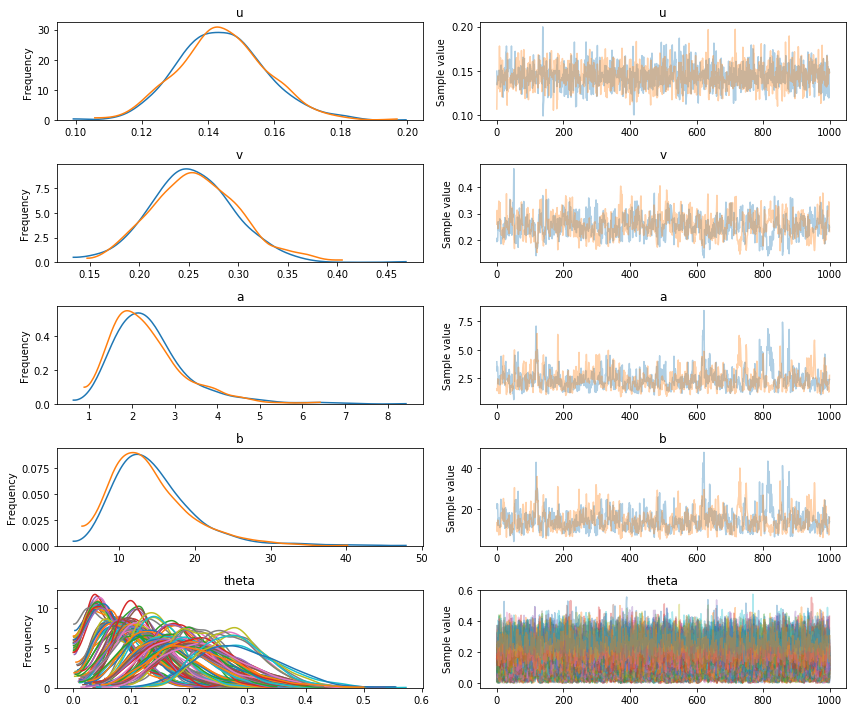

In [16]:
with pm.Model() as model:
    # Uninformative prior for alpha and beta
    u = pm.Uniform('u', 0, 1)
    v = pm.Uniform('v', 0, 1)
    
    alpha = pm.Deterministic('a', u / tt.pow(v, 2))
    beta = pm.Deterministic('b', (1 - u) / tt.pow(v, 2))
    
    theta = pm.Beta('theta', alpha=alpha, beta=beta, shape=len(n_rat))

    p = pm.Binomial('y', p=theta, observed=n_tumour, n=n_rat)
    trace = pm.sample(1000, tune=1000)

pm.traceplot(trace);